In [1]:
# the contour plots below help you define your investment strategy

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [205]:
risk = 0.05 # maximum risk you are willing to take per position
n_portfolio = 1/risk
capital = 10000 # total amount of money
buy_cost = 15 # transaction costs (buying)
#sell_cost = 15 #  transaction costs (selling)
#buy_price = 15 # stock price at buy
#sell_price = 11 # stock price at t_now > t_buy
total_yield = 0.07
delta_total_yield = 0.01

def roi(capital, risk, cost, total_yield):
    return (capital * risk - cost)*total_yield - 2*cost

def delta_roi(capital, risk, cost, delta_total_yield):
    return (capital * risk - cost) * delta_total_yield

def total_roi(capital, risk, cost, total_yield_avg, n):
    return n * ( (capital * risk - buy_cost)*total_yield_avg - 2*cost)

def total_roi2(capital, cost, total_yield_avg, n):
    return ( (capital - buy_cost*n)*total_yield_avg - 2*cost*n)

def delta_total_roi(capital, risk, cost, delta_total_yield_avg, n):
    return np.abs(np.sqrt(n) * ( (capital * risk - buy_cost
                    )*delta_total_yield_avg ))

In [206]:
roi(capital, risk, buy_cost, total_yield
   ), delta_roi(capital, risk, buy_cost, delta_total_yield
               )

(3.950000000000003, 4.8500000000000005)

In [207]:
total_roi(capital, risk, buy_cost, total_yield, n_portfolio
         ), delta_total_roi(capital, risk, buy_cost, 
                            delta_total_yield, n_portfolio)

(79.00000000000006, 21.689859381747965)

# Return over investment / Balance

In [208]:
risks, total_yields = np.meshgrid(
                     np.arange(0.01, 0.1, 0.001), 
                     np.arange(-0.15, 0.15, 0.001) )

rois = roi(capital, risks, buy_cost, total_yields)

Text(0.5, 1.0, 'ROI')

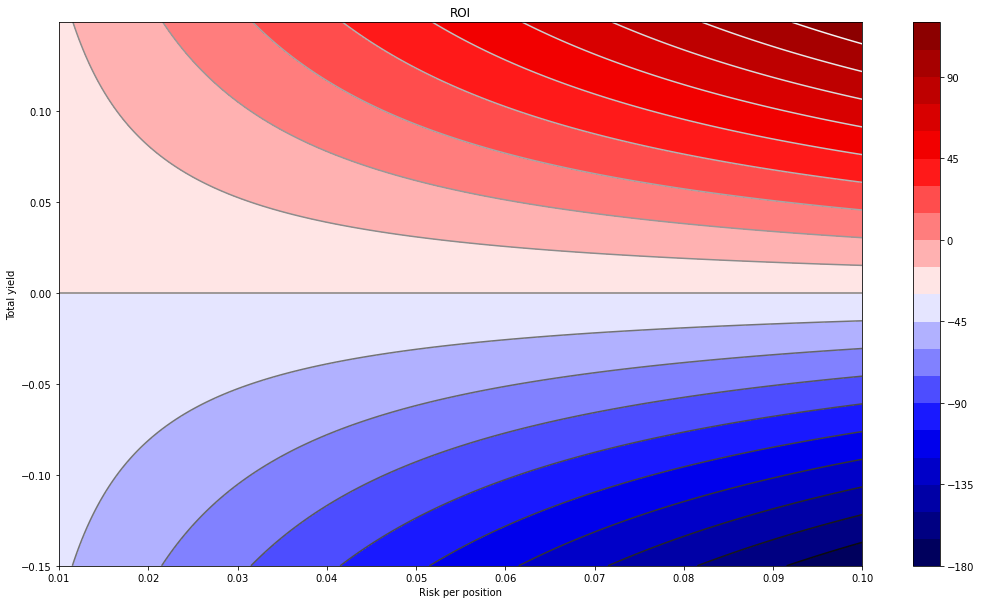

In [209]:
fig, ax = plt.subplots(figsize=(18, 10))
cs = ax.contour(risks, total_yields, rois, levels=25, cmap='gist_gray',
                )
cs = ax.contourf(risks, total_yields, rois, levels=25, cmap='seismic',
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('Risk per position')
ax.set_ylabel('Total yield')
ax.set_title('ROI')

# Delta ROI

In [210]:
risks, delta_total_yields = np.meshgrid(
                     np.arange(0.01, 0.1, 0.001), 
                     np.arange(0.01, 0.07, 0.001) )

delta_rois = delta_roi(capital, risks, buy_cost, delta_total_yields)

Text(0.5, 1.0, 'Delta ROI')

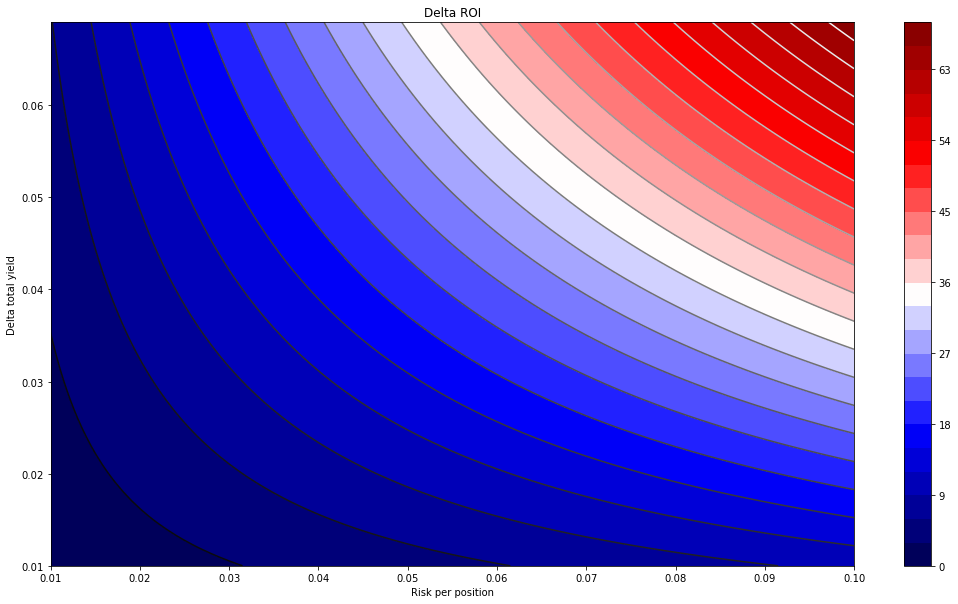

In [211]:
fig, ax = plt.subplots(figsize=(18, 10))
cs = ax.contour(risks, delta_total_yields, delta_rois, 
                levels=25, cmap='gist_gray',
                )
cs = ax.contourf(risks, delta_total_yields, delta_rois, 
                 levels=25, cmap='seismic',
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('Risk per position')
ax.set_ylabel('Delta total yield')
ax.set_title('Delta ROI')

# Total ROI

In [212]:
ns, total_yields = np.meshgrid(
                     np.arange(10, 50, 1), 
                     np.arange(0.0, 0.15, 0.01) )

total_rois = total_roi2(capital, buy_cost, total_yields, ns)

Text(0.5, 1.0, 'Total ROIs')

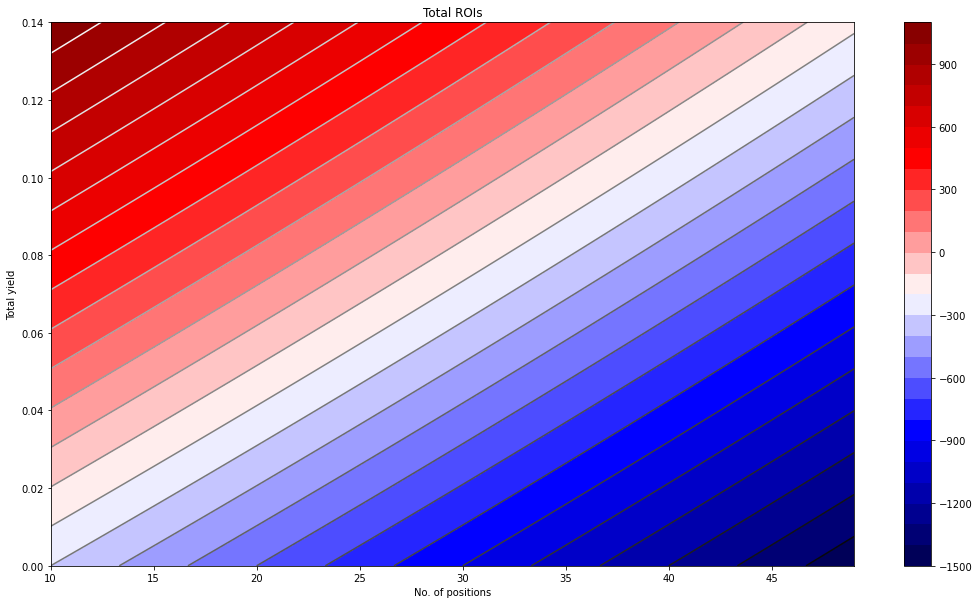

In [213]:
fig, ax = plt.subplots(figsize=(18, 10))
cs = ax.contour(ns, total_yields, total_rois, 
                levels=25, cmap='gray',
                )
cs = ax.contourf(ns, total_yields, total_rois, 
                 levels=25, cmap='seismic',
                )
cbar = fig.colorbar(cs)
ax.set_xlabel('No. of positions')
ax.set_ylabel('Total yield')
ax.set_title('Total ROIs')